In [1]:
import math
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
df = '../dataset/gaze_points.csv'

dataset = pd.read_csv(df)
display(dataset)

,Unnamed: 0,timestamp,x,y
0,0,1.687286e+09,1789.636364,72.803571
1,1,1.687286e+09,1675.022727,134.095982
2,2,1.687286e+09,1575.281250,186.762556
3,3,1.687286e+09,1489.643821,233.327951
4,4,1.687286e+09,1412.529252,274.072671
...,...,...,...,...
145,145,1.687286e+09,814.089486,1063.762928
146,146,1.687286e+09,813.237391,1062.899705
147,147,1.687286e+09,812.491808,1062.144385
148,148,1.687286e+09,811.839423,1062.447765


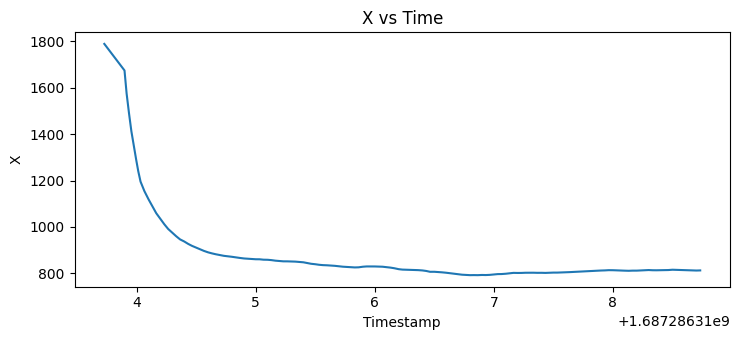

In [7]:
plt.plot(dataset.timestamp, dataset.x)
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('X vs Time')
plt.show()

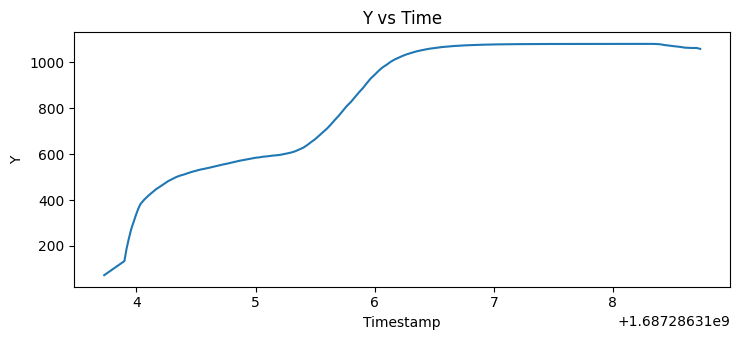

In [8]:
plt.plot(dataset.timestamp, dataset.y)
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('Y vs Time')
plt.show()

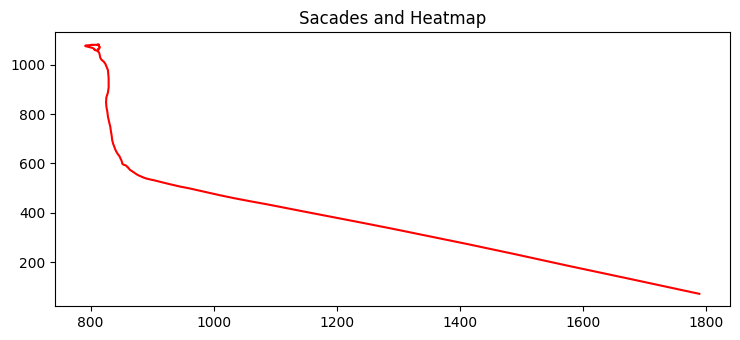

In [9]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x              = dataset.x
y              = dataset.y
datetime       = dataset.timestamp
grid_size      = 1
h              = 10
x_min          = min(x)
x_max          = max(x)
y_min          = min(y)
y_max          = max(y)

x_grid         = np.arange(x_min-h, x_max+h, grid_size)
y_grid         = np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh  = np.meshgrid(x_grid,y_grid)


xc             = x_mesh+(grid_size/2)
yc             = y_mesh+(grid_size/2)
""" 
def kde_quartic(d,h):
   dn=d/h
   P=(15/16)*(1-dn**2)**2
   
   return P
 
intensity_list=[]

for j in range(len(xc)):
    
    intensity_row=[]
    
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
            print('D -> ', d)
        print('kde_value_list -> ', kde_value_list)
            
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
        
    intensity_list.append(intensity_row)
 
intensity = np.array(intensity_list) """

plt.title("Sacades and Heatmap")
#plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x,y,'r', linestyle = '-')
#plt.colorbar()
plt.show() 
 